In [1]:
import networkx as nx
import pickle
import numpy as np
import pandas as pd
import scipy as sp
import MDAnalysis as mda
from MDAnalysis.analysis import dihedrals
import MDAnalysis.analysis as analysis
import MDAnalysis.analysis.rms
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
# from scipy.signal import find_peaks, peak_prominences
from mpl_toolkits.axes_grid1 import make_axes_locatable
from MDAnalysis.analysis import align
import matplotlib

In [2]:
plt.rcParams["font.family"] = "Times"
plt.rcParams['mathtext.fontset'] = 'cm'

In [4]:
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import (HydrogenBondAnalysis as HBA)

In [5]:
import string
import pandas as pd

In [6]:
import os
import sys
import glob
import pathlib
from scipy import spatial

In [7]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/analysis/hydrogenbonds.html

In [7]:
sys_up = '../sys_up'
sys_down = '../sys_down'

gly2_d2u = '../2-head_pro_gly_tmd_d2u'
gly2_u2d = '../2-head_pro_gly_tmd_u2d'
gly3_d2u = '../3-head_pro_gly_tmd_d2u'
gly3_u2d = '../3-head_pro_gly_tmd_u2d'
gly4_d2u = '../4-head_pro_gly_tmd_d2u'
gly4_u2d = '../4-head_pro_gly_tmd_u2d'
gly5_d2u = '../5-head_pro_gly_tmd_d2u'
gly5_u2d = '../5-head_pro_gly_tmd_u2d'
gly6_u2d = '../6-head_pro_gly_tmd_u2d'
nogly2_u2d = '../2-head_pro_nogly_tmd_u2d'

equil_gly_down = '../0-tmdminequil_gly_down'
equil_gly_up = '../0-tmdminequil_gly_up'
equil_nogly_down = '../0-tmdminequil_nogly_down'
equil_nogly_up = '../0-tmdminequil_nogly_up'

In [7]:
def mat2tri(mat):
    # take only half of the symmetric matrix and exclude the diagonal terms by k=1
    ind_triu = np.triu_indices_from(mat, k=1)
    val = mat[ind_triu]
    return val

# Protein simulation data from free equilibration

- ## Down

Crystal structure (wet)

In [21]:
downstruc = '6vxx_PROA'
gly_downpsf = f"{sys_down}/{downstruc}.psf"
gly_downpdb_crys = f"{sys_down}/{downstruc}.pdb"

U_gly_down_crys = mda.Universe(gly_downpsf, gly_downpdb_crys)

In [9]:
downstruc_nogly = '6vxx_PROA_nogly'
nogly_downpsf = f"{sys_down}/{downstruc_nogly}.psf"
nogly_downpdb_crys = f"{sys_down}/{downstruc_nogly}.pdb"

U_nogly_down_crys = mda.Universe(nogly_downpsf, nogly_downpdb_crys)

### Equil dcd (dried)

In [25]:
finsheet = open("txt/down_gly_sheet.txt","r").read()
finhelix = open("txt/down_gly_helix.txt","r").read()

gly

In [23]:
gly_downpsf_dry = f"{sys_down}/{downstruc}-dry.psf"

gly_down_dry2 = f'{equil_gly_down}/minequil_pt1/pt2-dryunwrap.dcd'
gly_down_dry3 = f'{equil_gly_down}/minequil_pt1/pt3-dryunwrap.dcd'
gly_down_dry4 = f'{equil_gly_down}/minequil_pt1/pt4-dryunwrap.dcd'
gly_down_dry5 = f'{equil_gly_down}/minequil_pt1/pt5-dryunwrap.dcd'
gly_down_dry6 = f'{equil_gly_down}/minequil_pt1/pt6-dryunwrap.dcd'
gly_down_dry7 = f'{equil_gly_down}/minequil_pt2/npt1-dryunwrap.dcd'
gly_down_dry8 = f'{equil_gly_down}/minequil_pt2/npt2-dryunwrap.dcd'
gly_down_dry9 = f'{equil_gly_down}/minequil_pt3/pt1-dryunwrap.dcd'
gly_down_dry10 = f'{equil_gly_down}/minequil_pt3/pt2-dryunwrap.dcd'
gly_down_dry11 = f'{equil_gly_down}/minequil_pt4/pt1-dryunwrap.dcd'
gly_down_dry12 = f'{equil_gly_down}/minequil_pt4/pt2-dryunwrap.dcd'
gly_down_dry13 = f'{equil_gly_down}/minequil_pt5/pt1-dryunwrap.dcd'
gly_down_dry14 = f'{equil_gly_down}/minequil_pt5/pt2-dryunwrap.dcd'
gly_down_dry15 = f'{equil_gly_down}/minequil_pt5/pt3-dryunwrap.dcd'
gly_down_dry16 = f'{equil_gly_down}/minequil_pt6/pt1-dryunwrap.dcd'
gly_down_dry17 = f'{equil_gly_down}/minequil_pt6/pt2-dryunwrap.dcd'
gly_down_dry18 = f'{equil_gly_down}/minequil_pt7/pt1-dryunwrap.dcd'
gly_down_dry19 = f'{equil_gly_down}/minequil_pt7/pt2-dryunwrap.dcd'

In [24]:
U_gly_equildown_dry = mda.Universe(gly_downpsf_dry, 
                                   [gly_down_dry2, gly_down_dry3, gly_down_dry4, gly_down_dry5, gly_down_dry6,
                                   gly_down_dry7, gly_down_dry8, gly_down_dry9, gly_down_dry10, gly_down_dry11,
                                   gly_down_dry12, gly_down_dry13, gly_down_dry14, gly_down_dry15, gly_down_dry16,
                                   gly_down_dry17, gly_down_dry18, gly_down_dry19])

In [38]:
U_gly_equildown_dry.trajectory

<ChainReader containing pt2-dryunwrap.dcd and 17 more with 50016 frames of 21586 atoms>

In [26]:
U_gly_equildown_dry.select_atoms("name CA and resid "+ finsheet + " " + finhelix)

<AtomGroup with 604 atoms>

In [27]:
alignment = align.AlignTraj(U_gly_equildown_dry, U_gly_down_crys, 
                            filename=f'{equil_gly_down}/equildown_dry_aligned2downCrysCAss_50ns.dcd', 
                            select="name CA and resid "+ finsheet + " " + finhelix)
alignment.run()

In [23]:
R_gly_down = analysis.rms.RMSD(U_gly_equildown_dry, U_gly_down_crys, 
                              select="name CA and resid "+ finsheet + " " + finhelix)
R_gly_down.run(step=100)

nogly

In [191]:
nogly_downpsf_dry = f"{sys_down}/{downstruc_nogly}-dry.psf"

nogly_down_dry2 = f'{equil_nogly_down}/minequil_pt1/pt2-dryunwrap.dcd'
nogly_down_dry3 = f'{equil_nogly_down}/minequil_pt1/pt3-dryunwrap.dcd'
nogly_down_dry4 = f'{equil_nogly_down}/minequil_pt1/pt4-dryunwrap.dcd'
nogly_down_dry5 = f'{equil_nogly_down}/minequil_pt1/pt5-dryunwrap.dcd'
nogly_down_dry6 = f'{equil_nogly_down}/minequil_pt1/pt6-dryunwrap.dcd'
nogly_down_dry7 = f'{equil_nogly_down}/minequil_pt1/pt7-dryunwrap.dcd'
nogly_down_dry8 = f'{equil_nogly_down}/minequil_pt1/pt8-dryunwrap.dcd'
nogly_down_dry9 = f'{equil_nogly_down}/minequil_pt2/npt1-dryunwrap.dcd'
nogly_down_dry10 = f'{equil_nogly_down}/minequil_pt2/npt2-dryunwrap.dcd'
nogly_down_dry11 = f'{equil_nogly_down}/minequil_pt3/npt1-dryunwrap.dcd'
nogly_down_dry12 = f'{equil_nogly_down}/minequil_pt3/npt2-dryunwrap.dcd'
nogly_down_dry13 = f'{equil_nogly_down}/minequil_pt4/npt1-dryunwrap.dcd'
nogly_down_dry14 = f'{equil_nogly_down}/minequil_pt4/npt2-dryunwrap.dcd'
nogly_down_dry15 = f'{equil_nogly_down}/minequil_pt5/npt1-dryunwrap.dcd'
nogly_down_dry16 = f'{equil_nogly_down}/minequil_pt5/npt2-dryunwrap.dcd'
nogly_down_dry17 = f'{equil_nogly_down}/minequil_pt6/npt1-dryunwrap.dcd'
nogly_down_dry18 = f'{equil_nogly_down}/minequil_pt6/npt2-dryunwrap.dcd'
nogly_down_dry19 = f'{equil_nogly_down}/minequil_pt7/npt1-dryunwrap.dcd'
nogly_down_dry20 = f'{equil_nogly_down}/minequil_pt7/npt2-dryunwrap.dcd'

In [205]:
U_nogly_equildown_dry = mda.Universe(nogly_downpsf_dry, 
                                   [nogly_down_dry2, nogly_down_dry3, nogly_down_dry4, nogly_down_dry5, nogly_down_dry6,
                                   nogly_down_dry7, nogly_down_dry8, nogly_down_dry9, nogly_down_dry10, nogly_down_dry11,
                                   nogly_down_dry12, nogly_down_dry13, nogly_down_dry14, nogly_down_dry15, nogly_down_dry16, 
                                    nogly_down_dry17, nogly_down_dry18, nogly_down_dry19, nogly_down_dry20])

c:\users\xinyan\anaconda3\envs\anaconda37pc\lib\site-packages\MDAnalysis\topology\base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)


In [206]:
U_nogly_equildown_dry.trajectory

<ChainReader containing pt2-dryunwrap.dcd and 18 more with 50003 frames of 17689 atoms>

In [281]:
alignment = align.AlignTraj(U_nogly_equildown_dry, U_nogly_down_crys, 
                            filename=f'{equil_nogly_down}/equildown_dry_aligned2downCrysCA_50ns.dcd', select="protein and name CA",)
alignment.run()

c:\users\xinyan\anaconda3\envs\anaconda37pc\lib\site-packages\MDAnalysis\core\selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


### Calculate pro_gly interaction

In [10]:
skeleton_dataframe = pd.DataFrame(
                                [['NA'] * 6], 
                                columns=['Frame', 'Donor Index',   
                                         'Hydrogen Index', 'Acceptor Index', 'D-A Distance',      
                                         'Angle'])

In [11]:
carb = []
for ii in range(20):
    carb.append('CAR'+ string.ascii_uppercase[ii]) 

Pro_gly

In [13]:
hbonds_down_pro_gly = {}

In [1080]:
for i in range(19,20):
    hbonds = HBA(universe=U_gly_equildown_dry, 
                 donors_sel="segid PROA and not name H*", hydrogens_sel="segid PROA and name H*", 
                 acceptors_sel=f"segid {carb[i]} and not name H*", 
                 d_a_cutoff=3.5, d_h_a_angle_cutoff=150)
    hbonds.run(step=10)
    
    df = pd.DataFrame(hbonds.hbonds, columns=skeleton_dataframe.columns)
    df.to_csv(f'hbond_df_pro_gly/{carb[i]}.csv')
    
    hbonds_down_pro_gly[i] = hbonds.hbonds
    print(f"Finish calculating Hbonds between protein and {carb[i]}.")

Finish calculating Hbonds between protein and CART.


In [118]:
# # Dump dic
# # columns=['Frame'(real #frame in dcd, independent of step), 'Donor Index','Hydrogen Index', 'Acceptor Index', 'D-A Distance', 'Angle', 'Pro resid']
# with open(f'saved_pkl/hbonds_down_pro_gly_dic.pkl', "wb") as f: # write binary
#     pickle.dump(hbonds_down_pro_gly, f)

In [24]:
# Load dic
with open(f'saved_pkl/hbonds_down_pro_gly_dic.pkl', "rb") as f: # write binary
    hbonds_down_pro_gly = pickle.load(f)

Gly_pro

In [ ]:
hbonds_down_gly_pro = {}

In [1081]:
for i in range(20):
    hbonds = HBA(universe=U_gly_equildown_dry, 
                 donors_sel=f"segid {carb[i]} and not name H*", hydrogens_sel=f"segid {carb[i]} and name H*", 
                 acceptors_sel="segid PROA and not name H*", 
                 d_a_cutoff=3.5, d_h_a_angle_cutoff=150)
    hbonds.run(step=10)

    df = pd.DataFrame(hbonds.hbonds, columns=skeleton_dataframe.columns)
    df.to_csv(f'hbond_df_gly_pro/{carb[i]}.csv')
    
    hbonds_down_gly_pro[i] = hbonds.hbonds
    print(f"Finish calculating Hbonds between {carb[i]} and protein.")

Finish calculating Hbonds between CART and protein.


In [116]:
# # Dump dic
# # columns=['Frame'(real #frame in dcd, independent of step), 'Donor Index','Hydrogen Index', 'Acceptor Index', 'D-A Distance', 'Angle', 'Pro resid']
# with open(f'saved_pkl/hbonds_down_gly_pro_dic.pkl', "wb") as f: # write binary
#     pickle.dump(hbonds_down_gly_pro, f)

In [25]:
# Load dic
with open(f'saved_pkl/hbonds_down_gly_pro_dic.pkl', "rb") as f: # write binary
    hbonds_down_gly_pro = pickle.load(f)

Combine two.

In [120]:
U = U_gly_equildown_dry

aaa = hbonds_down_pro_gly.copy()
bbb = hbonds_down_gly_pro.copy()
ccc = {}

for i in range(20):
    
    res_col1 = np.zeros([len(aaa[i]),1])
    for j in range(len(aaa[i])):
        res_col1[j] = U.atoms[int(aaa[i][j][1])].resid # start from 1
    aaa[i] = np.hstack([aaa[i], res_col1])
    
    res_col2 = np.zeros([len(bbb[i]),1])
    for k in range(len(bbb[i])):
        res_col2[k] = U.atoms[int(bbb[i][k][3])].resid
    bbb[i] = np.hstack([bbb[i], res_col2]) 
    
#     append bbb to the bottom of aaa
    ccc[i] = np.vstack([aaa[i], bbb[i]])

In [121]:
hbonds_down_pro_gly_all = ccc.copy()

In [171]:
# with open(f'saved_pkl/hbonds_down_pro_gly_res_all.pkl', "wb") as f: # write binary
#     pickle.dump(hbonds_down_pro_gly_all, f)

In [26]:
with open(f'saved_pkl/hbonds_down_pro_gly_res_all.pkl', "rb") as f: # write binary
    hbonds_down_pro_gly_all = pickle.load(f)

- ## Up

Crystal structure (wet)

In [17]:
U_gly_up_crys.select_atoms("protein and resid 17")

c:\users\xinyan\anaconda3\envs\anaconda37pc\lib\site-packages\MDAnalysis\core\selection.py:640: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)


<AtomGroup with 13 atoms>

In [31]:
upstruc = '6vsb_UPprotomer'
gly_uppsf = f"{sys_up}/{upstruc}.psf"
gly_uppdb_crys = f"{sys_up}/{upstruc}.pdb"

U_gly_up_crys = mda.Universe(gly_uppsf, gly_uppdb_crys)

In [32]:
upstruc_nogly = '6vsb_UPprotomer_nogly'
nogly_uppsf = f"{sys_up}/{upstruc_nogly}.psf"
nogly_uppdb_crys = f"{sys_up}/{upstruc_nogly}.pdb"

U_nogly_up_crys = mda.Universe(nogly_uppsf, nogly_uppdb_crys)

### Equil dcd (dried)

gly

In [33]:
gly_uppsf_dry = f"{sys_up}/{upstruc}-dry.psf"

gly_up_dry2 = f'{equil_gly_up}/minequil_pt1/pt2-dryunwrap.dcd'
gly_up_dry3 = f'{equil_gly_up}/minequil_pt1/pt3-dryunwrap.dcd'
gly_up_dry4 = f'{equil_gly_up}/minequil_pt1/pt4-dryunwrap.dcd'
gly_up_dry5 = f'{equil_gly_up}/minequil_pt1/pt5-dryunwrap.dcd'
gly_up_dry6 = f'{equil_gly_up}/minequil_pt1/pt6-dryunwrap.dcd'
gly_up_dry7 = f'{equil_gly_up}/minequil_pt2/npt1-dryunwrap.dcd'
gly_up_dry8 = f'{equil_gly_up}/minequil_pt2/npt2-dryunwrap.dcd'
gly_up_dry9 = f'{equil_gly_up}/minequil_pt3/pt1-dryunwrap.dcd'
gly_up_dry10 = f'{equil_gly_up}/minequil_pt3/pt2-dryunwrap.dcd'
gly_up_dry11 = f'{equil_gly_up}/minequil_pt4/pt1-dryunwrap.dcd'
gly_up_dry12 = f'{equil_gly_up}/minequil_pt4/pt2-dryunwrap.dcd'
gly_up_dry13 = f'{equil_gly_up}/minequil_pt5/pt1-dryunwrap.dcd'
gly_up_dry14 = f'{equil_gly_up}/minequil_pt5/pt2-dryunwrap.dcd'
gly_up_dry15 = f'{equil_gly_up}/minequil_pt6/pt1-dryunwrap.dcd'
gly_up_dry16 = f'{equil_gly_up}/minequil_pt6/pt2-dryunwrap.dcd'
gly_up_dry17 = f'{equil_gly_up}/minequil_pt6/pt3-dryunwrap.dcd'
gly_up_dry18 = f'{equil_gly_up}/minequil_pt7/pt1-dryunwrap.dcd'
gly_up_dry19 = f'{equil_gly_up}/minequil_pt7/pt2-dryunwrap.dcd'

In [34]:
U_gly_equilup_dry = mda.Universe(gly_uppsf_dry, 
                                   [gly_up_dry2, gly_up_dry3, gly_up_dry4, gly_up_dry5, gly_up_dry6,
                                   gly_up_dry7, gly_up_dry8, gly_up_dry9, gly_up_dry10, gly_up_dry11,
                                   gly_up_dry12, gly_up_dry13, gly_up_dry14, gly_up_dry15, gly_up_dry16,
                                   gly_up_dry17, gly_up_dry18, gly_up_dry19])

In [36]:
len(U_gly_equilup_dry.trajectory)

50012

In [39]:
alignment = align.AlignTraj(U_gly_equilup_dry, U_gly_down_crys, 
                            filename=f'{equil_gly_up}/equilup_dry_aligned2downCrysCAss_50ns.dcd', 
                            select="name CA and resid "+ finsheet + " " + finhelix)
alignment.run()

nogly

In [194]:
nogly_uppsf_dry = f"{sys_up}/{upstruc_nogly}-dry.psf"

nogly_up_dry3 = f'{equil_nogly_up}/minequil_pt1/pt3-dryunwrap.dcd'
nogly_up_dry4 = f'{equil_nogly_up}/minequil_pt1/pt4-dryunwrap.dcd'
nogly_up_dry5 = f'{equil_nogly_up}/minequil_pt1/pt5-dryunwrap.dcd'
nogly_up_dry6 = f'{equil_nogly_up}/minequil_pt1/pt6-dryunwrap.dcd'
nogly_up_dry7 = f'{equil_nogly_up}/minequil_pt2/npt1-dryunwrap.dcd'
nogly_up_dry8 = f'{equil_nogly_up}/minequil_pt2/npt2-dryunwrap.dcd'
nogly_up_dry9 = f'{equil_nogly_up}/minequil_pt3/pt1-dryunwrap.dcd'
nogly_up_dry10 = f'{equil_nogly_up}/minequil_pt3/pt2-dryunwrap.dcd'
nogly_up_dry11 = f'{equil_nogly_up}/minequil_pt4/pt1-dryunwrap.dcd'
nogly_up_dry12 = f'{equil_nogly_up}/minequil_pt4/pt2-dryunwrap.dcd'
nogly_up_dry13 = f'{equil_nogly_up}/minequil_pt5/pt1-dryunwrap.dcd'
nogly_up_dry14 = f'{equil_nogly_up}/minequil_pt5/pt2-dryunwrap.dcd'
nogly_up_dry15 = f'{equil_nogly_up}/minequil_pt6/pt1-dryunwrap.dcd'
nogly_up_dry16 = f'{equil_nogly_up}/minequil_pt6/pt2-dryunwrap.dcd'
nogly_up_dry17 = f'{equil_nogly_up}/minequil_pt7/pt1-dryunwrap.dcd'
nogly_up_dry18 = f'{equil_nogly_up}/minequil_pt7/pt2-dryunwrap.dcd'

In [199]:
U_nogly_equilup_dry = mda.Universe(nogly_uppsf_dry, 
                                   [nogly_up_dry3, nogly_up_dry4, nogly_up_dry5, nogly_up_dry6,
                                   nogly_up_dry7, nogly_up_dry8, nogly_up_dry9, nogly_up_dry10, nogly_up_dry11,
                                   nogly_up_dry12, nogly_up_dry13, nogly_up_dry14, nogly_up_dry15, nogly_up_dry16,
                                   nogly_up_dry17, nogly_up_dry18])

c:\users\xinyan\anaconda3\envs\anaconda37pc\lib\site-packages\MDAnalysis\topology\base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)


In [200]:
U_nogly_equilup_dry.trajectory

<ChainReader containing pt3-dryunwrap.dcd and 15 more with 48951 frames of 17689 atoms>

In [282]:
alignment = align.AlignTraj(U_nogly_equilup_dry, U_nogly_down_crys, 
                            filename=f'{equil_nogly_up}/equilup_dry_aligned2downCrysCA_50ns.dcd', select="protein and name CA",)
alignment.run()

# Analysis

# `Glycan(H-bond)_Protein interaction analysis`

### Calculate pro_gly interaction

Pro_gly

In [50]:
carb = []
for ii in range(20):
    carb.append('CAR'+ string.ascii_uppercase[ii]) 

In [21]:
hbonds_up_pro_gly = {}

In [1078]:
for i in range(19, 20):
    hbonds = HBA(universe=U_gly_equilup_dry, 
                 donors_sel="segid PROA and not name H*", hydrogens_sel="segid PROA and name H*", 
                 acceptors_sel=f"segid {carb[i]} and not name H*", 
                 d_a_cutoff=3.5, d_h_a_angle_cutoff=150)
    hbonds.run(step=10)
    
    df = pd.DataFrame(hbonds.hbonds, columns=skeleton_dataframe.columns)
    df.to_csv(f'hbond_df_pro_gly/{carb[i]}.csv')
    
    hbonds_up_pro_gly[i] = hbonds.hbonds
    print(f"Finish calculating Hbonds between protein and {carb[i]}.")

Finish calculating Hbonds between protein and CART.


In [114]:
# # Dump dic
# with open(f'hbond_df_pro_gly/hbonds_up_pro_gly_dic.pkl', "wb") as f: # write binary
#     pickle.dump(hbonds_up_pro_gly, f)

In [27]:
# Load dic
with open(f'saved_pkl/hbonds_up_pro_gly_dic.pkl', "rb") as f: # write binary
    hbonds_up_pro_gly = pickle.load(f)

Gly_pro

In [ ]:
hbonds_up_gly_pro = {}

In [1079]:
for i in range(19,20):
    hbonds = HBA(universe=U_gly_equilup_dry, 
                 donors_sel=f"segid {carb[i]} and not name H*", hydrogens_sel=f"segid {carb[i]} and name H*", 
                 acceptors_sel="segid PROA and not name H*", 
                 d_a_cutoff=3.5, d_h_a_angle_cutoff=150)
    hbonds.run(step=10)

    df = pd.DataFrame(hbonds.hbonds, columns=skeleton_dataframe.columns)
    df.to_csv(f'hbond_df_gly_pro/{carb[i]}.csv')
    
    hbonds_up_gly_pro[i] = hbonds.hbonds
    print(f"Finish calculating Hbonds between {carb[i]} and protein.")

Finish calculating Hbonds between CART and protein.


In [112]:
# # Dump dic
# with open(f'saved_pkl/hbonds_up_gly_pro_dic.pkl', "wb") as f: # write binary
#     pickle.dump(hbonds_up_gly_pro, f)

In [28]:
# Load dic
with open(f'saved_pkl/hbonds_up_gly_pro_dic.pkl', "rb") as f: # write binary
    hbonds_up_gly_pro = pickle.load(f)

Combine two

In [123]:
# combine pro-gly and gly-pro and append a column storing protein resid

U = U_gly_equilup_dry

aaa = hbonds_up_pro_gly.copy()
bbb = hbonds_up_gly_pro.copy()
ccc = {}

for i in range(20):
    
    res_col1 = np.zeros([len(aaa[i]),1])
    for j in range(len(aaa[i])):
        res_col1[j] = U.atoms[int(aaa[i][j][1])].resid
    aaa[i] = np.hstack([aaa[i], res_col1])
    
    res_col2 = np.zeros([len(bbb[i]),1])
    for k in range(len(bbb[i])):
        res_col2[k] = U.atoms[int(bbb[i][k][3])].resid
    bbb[i] = np.hstack([bbb[i], res_col2]) 
    
#     append bbb to the bottom of aaa
    ccc[i] = np.vstack([aaa[i], bbb[i]])

In [124]:
hbonds_up_pro_gly_all = ccc.copy()

In [170]:
# with open(f'saved_pkl/hbonds_up_pro_gly_res_all.pkl', "wb") as f: # write binary
#     pickle.dump(hbonds_up_pro_gly_all, f)

In [29]:
with open(f'saved_pkl/hbonds_up_pro_gly_res_all.pkl', "rb") as f: # write binary
    hbonds_up_pro_gly_all = pickle.load(f)

Read dic from .pkl

In [46]:
with open(f'saved_pkl/hbonds_down_pro_gly_res_all.pkl', "rb") as f: # read binary
    hbonds_down_pro_gly_all = pickle.load(f)

In [47]:
with open(f'saved_pkl/hbonds_up_pro_gly_res_all.pkl', "rb") as f: # read binary
    hbonds_up_pro_gly_all = pickle.load(f)

- ## Down

In [48]:
gset_res_down = ['N17', 'N282', 'N61', 'N74', 'N122', 'N149', 'N343', 'N165', 'N603', 'N234', 'N616', 'N331', 
              'N657', 'N709', 'O323', 'N717', 'N1074', 'N1098', 'N1134', 'N801']

In [51]:
temp = [int(item[1:]) for item in gset_res_down]

df_gly_down = pd.DataFrame(data=np.vstack([carb, gset_res_down, temp, list(range(20))]).T, 
                  columns=["CAR*", "site", "siteINT", "index"])

In [36]:
df_gly_down

,CAR*,site,siteINT,index
0,CARA,N17,17,0
1,CARB,N282,282,1
2,CARC,N61,61,2
3,CARD,N74,74,3
4,CARE,N122,122,4
5,CARF,N149,149,5
6,CARG,N343,343,6
7,CARH,N165,165,7
8,CARI,N603,603,8
9,CARJ,N234,234,9


(1) Full gly-pro hbonds info

In [52]:
def hbonds_map_3D(U, bond_dic, step=10, ngly=20, nres=1146):
    '''
    >>> Return a 3D H-honds map from a H-bonds dictionary,
        with shape [time x ngly x (nres+1)].
        This 3D map includes all info from MD simulation.
    >>> Args: U --> Universe
              bond_dic --> bond_dic[gly] has shape ...x6    
    '''
    hbonds_pro_gly_map = np.zeros([len(U.trajectory)//step+1, ngly, nres+1])
    for gly in range(ngly):
        for i in range(len(bond_dic[gly])):
            temp = bond_dic[gly][i]
            res = int(temp[-1])
            time = int(temp[0]//step)
            hbonds_pro_gly_map[time][gly][res] += 1
    
    return hbonds_pro_gly_map

In [53]:
def hbonds_map_2D(hbonds_3Dmap, start, countframe=True):
    '''
    >>> Return a 2D H-honds map from a 3D H-honds map,
        with shape [ngly x (nres+1)].
        If countframe is True, return a binary map, 
        not considering multi-Hbonds of the same pro-gly pair in one frame.
    >>> Args 
    '''
    if countframe:
        return np.sum(hbonds_3Dmap.astype(bool)[start:], axis=0).astype(float)
    else:
        return np.sum(hbonds_3Dmap[start:], axis=0)

In [54]:
hbonds_down_pro_gly_map3d = hbonds_map_3D(U_gly_equildown_dry, hbonds_down_pro_gly_all, step=10, ngly=20, nres=1146)

In [55]:
hbonds_down_map2d = hbonds_map_2D(hbonds_down_pro_gly_map3d, start=200, countframe=False)
hbonds_down_map2d_cap = hbonds_map_2D(hbonds_down_pro_gly_map3d, start=200, countframe=True)

In [56]:
def df_pro_gly(df_gly, glysite, hbonds_2Dmap, hbonds_2Dmap_cap):
    ind = df_gly_down[df_gly_down['site']==glysite]['index'].to_numpy(dtype=int)[0]
    
    resind = np.where(hbonds_2Dmap[ind]>0)
    res = resind[0].reshape([len(resind[0]), 1])
    numbonds = hbonds_2Dmap[ind][resind].reshape([len(resind[0]), 1])
    numframes = hbonds_2Dmap_cap[ind][resind].reshape([len(resind[0]), 1])
    
    df = pd.DataFrame(data=np.hstack([res, numframes, numbonds]), 
                      columns=["pro res", "#frames", "#Hbonds"])
    dff = df.astype(int)
    return dff

In [57]:
amap = hbonds_map_2D(hbonds_down_pro_gly_map3d, start=200, countframe=False)
amap_cap = hbonds_map_2D(hbonds_down_pro_gly_map3d, start=200, countframe=True)

In [59]:
df = df_pro_gly(df_gly_down, 'N17', amap, amap_cap)
df[df['#frames']>=1000]

,pro res,#frames,#Hbonds
12,111,1260,1718
17,137,2232,3237
18,138,2064,2330


In [174]:
df = df_pro_gly(df_gly_down, 'N61', amap, amap_cap)
df[df['#frames']>=800]

,pro res,#frames,#Hbonds
4,59,2622,2714
15,635,926,1022
18,638,960,1157
20,640,823,1275


In [159]:
df = df_pro_gly(df_gly_down, 'N122', amap, amap_cap)
df[df['#frames']>=1000]

,pro res,#frames,#Hbonds
12,160,3060,3989
14,162,1605,1779
15,163,2144,2704
16,164,1268,1591


In [160]:
df = df_pro_gly(df_gly_down, 'N149', amap, amap_cap)
df[df['#frames']>=1000]

,pro res,#frames,#Hbonds
8,12,1118,1148
14,148,1893,1915


In [161]:
df = df_pro_gly(df_gly_down, 'N234', amap, amap_cap)
df[df['#frames']>=1000]

,pro res,#frames,#Hbonds
2,88,2886,6048
5,235,2487,2490
6,236,2061,2232


In [172]:
df = df_pro_gly(df_gly_down, 'O323', amap, amap_cap)
df[df['#frames']>=800]

,pro res,#frames,#Hbonds
0,321,1683,1745
1,322,970,1031
9,625,1372,1454


In [171]:
df = df_pro_gly(df_gly_down, 'N331', amap, amap_cap)
df[df['#frames']>=800]

,pro res,#frames,#Hbonds
17,580,2949,3052
20,583,917,1406


In [164]:
df = df_pro_gly(df_gly_down, 'N343', amap, amap_cap)
df[df['#frames']>=1000]

,pro res,#frames,#Hbonds
9,371,1519,1635


In [165]:
df = df_pro_gly(df_gly_down, 'N603', amap, amap_cap)
df[df['#frames']>=1000]

,pro res,#frames,#Hbonds
6,281,1064,1784
11,307,1065,1075


In [166]:
df = df_pro_gly(df_gly_down, 'N717', amap, amap_cap)
df[df['#frames']>=1000]

,pro res,#frames,#Hbonds
12,925,1900,2127
14,928,1809,1858


In [167]:
df = df_pro_gly(df_gly_down, 'N1074', amap, amap_cap)
df[df['#frames']>=1000]

,pro res,#frames,#Hbonds
10,702,1627,2227
22,1072,1690,1721


(2) Further select star glycans playing important roles (more than 1000 Hbonds in total)

In [60]:
def select_critical_Hbonds(startframe, thre, df_gly, hbonds_3Dmap, threframe=True):
    amap = hbonds_map_2D(hbonds_3Dmap, start=startframe, countframe=False)
    amap_cap = hbonds_map_2D(hbonds_3Dmap, start=startframe, countframe=True)
    
    pair_countbond = []
    pair_countframe = []
    pair_name = []
    gly_sitenum = []
    
    gly_sites = df_gly['site'].to_numpy(dtype=str)
    for this_gly in gly_sites:
        
        df = df_pro_gly(df_gly_down, this_gly, amap, amap_cap)
        if threframe:
            dfarray = df[df['#frames']>=thre].to_numpy(dtype=int)
        else:
            dfarray = df[df['#Hbonds']>=thre].to_numpy(dtype=int)
        if len(dfarray)>0:
            for row in dfarray:
                pair_name.append(f'({this_gly}, res{row[0]})')
                pair_countframe.append(row[1])
                pair_countbond.append(row[2])
                gly_sitenum.append(int(this_gly[1:]))
                
    gly_sitenum = np.array(gly_sitenum)
    order = np.argsort(gly_sitenum)
    pair_name = np.array(pair_name)
    pair_countframe = np.array(pair_countframe)
    pair_countbond = np.array(pair_countbond)
    
    return [pair_name[order], pair_countframe[order], pair_countbond[order]]

In [61]:
skip = 200

In [62]:
down_name, down_countframe, down_countbond = select_critical_Hbonds(skip, 1000, 
                                                                    df_gly_down, 
                                                                    hbonds_down_pro_gly_map3d, threframe=True)

In [63]:
down_name

array(['(N17, res111)', '(N17, res137)', '(N17, res138)', '(N61, res59)',
       '(N122, res160)', '(N122, res162)', '(N122, res163)',
       '(N122, res164)', '(N149, res12)', '(N149, res148)',
       '(N234, res236)', '(N234, res88)', '(N234, res235)',
       '(N282, res281)', '(O323, res625)', '(O323, res321)',
       '(N331, res580)', '(N343, res371)', '(N603, res281)',
       '(N603, res307)', '(N657, res655)', '(N709, res710)',
       '(N717, res925)', '(N717, res928)', '(N801, res803)',
       '(N1074, res702)', '(N1074, res1072)', '(N1098, res1100)',
       '(N1098, res1110)', '(N1134, res1132)', '(N1134, res1127)'],
      dtype='<U16')

In [65]:
def unique(array):
    uniq = {}
    for i in array:
         uniq[i] = 1
    return uniq.keys()

In [66]:
readset = np.array([item.split(',')[0] for item in down_name])
repeat = np.array([len(np.where(readset==this)[0]) for this in unique(readset)])

In [69]:
barcolors = [(np.random.random(), np.random.random(), np.random.random()) for i in range(len(np.unique(readset)))]
barcolors = np.repeat(barcolors, repeat, axis=0)

<IPython.core.display.Javascript object>


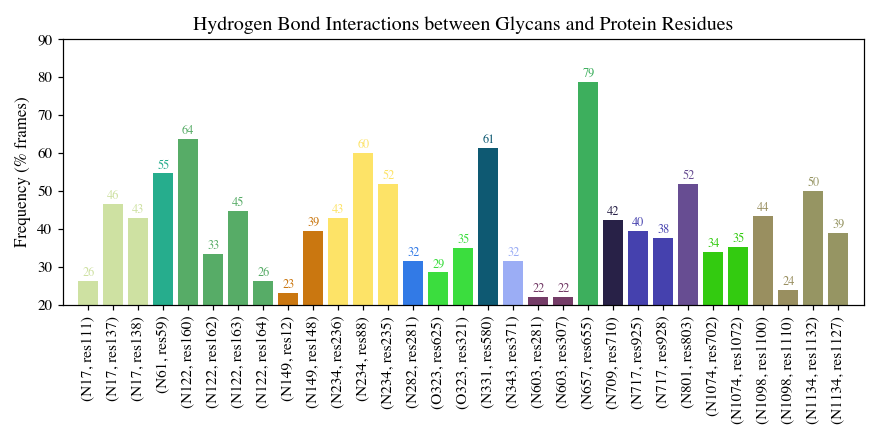

In [70]:
fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111)
yvalue = down_countframe/(5000-skip)*100
ax.bar(down_name, yvalue, label='frame', color=barcolors)
plt.xticks(ticks=np.arange(len(down_name)), labels=down_name, rotation=90, fontsize=10)
plt.ylabel('Frequency (% frames)', fontsize=11)
plt.title(f'Hydrogen Bond Interactions between Glycans and Protein Residues', fontsize=13)

j = 0
for index,data in enumerate(yvalue):
    plt.text(x=index , y =data+0.5 , s=f"{data:.0f}" , fontdict=dict(fontsize=8, color=barcolors[j]), 
             ha='center', va='bottom')
    j += 1

plt.xlim(-1, len(barcolors))
plt.ylim(20,90)

plt.tight_layout()
plt.show()

plt.savefig('ReportPlots/FreePlot/hbonds_bar20down.png', dpi=300)

In [186]:
df = df_pro_gly(df_gly_down, 'O323', amap, amap_cap)
df[df['#frames']>=700]

,pro res,#frames,#Hbonds
0,321,1683,1745
1,322,970,1031
4,537,747,771
9,625,1372,1454


In [185]:
df = df_pro_gly(df_gly_down, 'N331', amap, amap_cap)
df[df['#frames']>=800]

,pro res,#frames,#Hbonds
17,580,2949,3052
20,583,917,1406


In [179]:
df = df_pro_gly(df_gly_down, 'N603', amap, amap_cap)
df[df['#frames']>=500]

,pro res,#frames,#Hbonds
6,281,1064,1784
11,307,1065,1075


(3) Exclude glycans interacting with nerighboring residues.

In [57]:
ind = []
i = 0
for lab in down_name:
    temp = lab.split(",")
    if int(temp[0][2:])-2>int(temp[1][4:-1]) or int(temp[0][2:])+2<int(temp[1][4:-1]):
        ind.append(i)
    i += 1

<IPython.core.display.Javascript object>


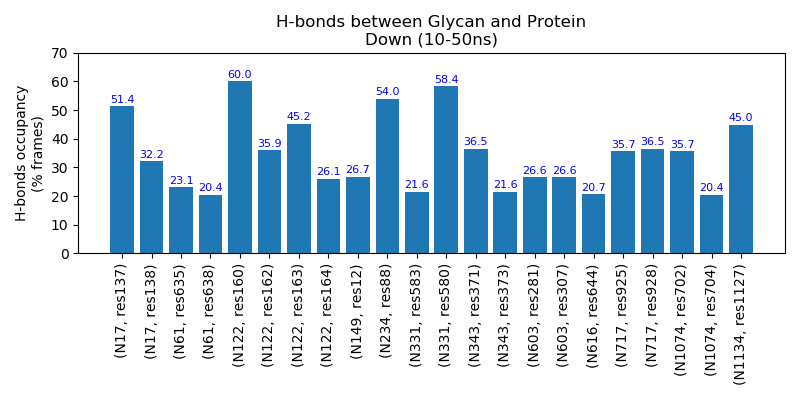

In [346]:
fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111)
yval = down_countframe[ind]/(5000-skip)*100
ax.bar(down_name[ind], yval)
plt.xticks(ticks=np.arange(len(ind)), labels=down_name[ind], rotation=90)
plt.ylabel('H-bonds occupancy\n(% frames)')
plt.title(f'H-bonds between Glycan and Protein\nDown ({skip*0.01:.0f}-50ns)')

for index,data in enumerate(yval):
    plt.text(x=index , y =data+0.5 , s=f"{data:.1f}" , fontdict=dict(fontsize=8, color='b'), ha='center', va='bottom')
plt.ylim(0,70)

plt.tight_layout()
plt.show()

(4) Show position info for H-bonds.

In [233]:
order = np.argsort(df_gly_down[['siteINT']].to_numpy(dtype=int).flatten())

In [231]:
skip = 0

In [232]:
bmap = hbonds_map_2D(hbonds_down_pro_gly_map3d, start=skip, countframe=False)

<IPython.core.display.Javascript object>


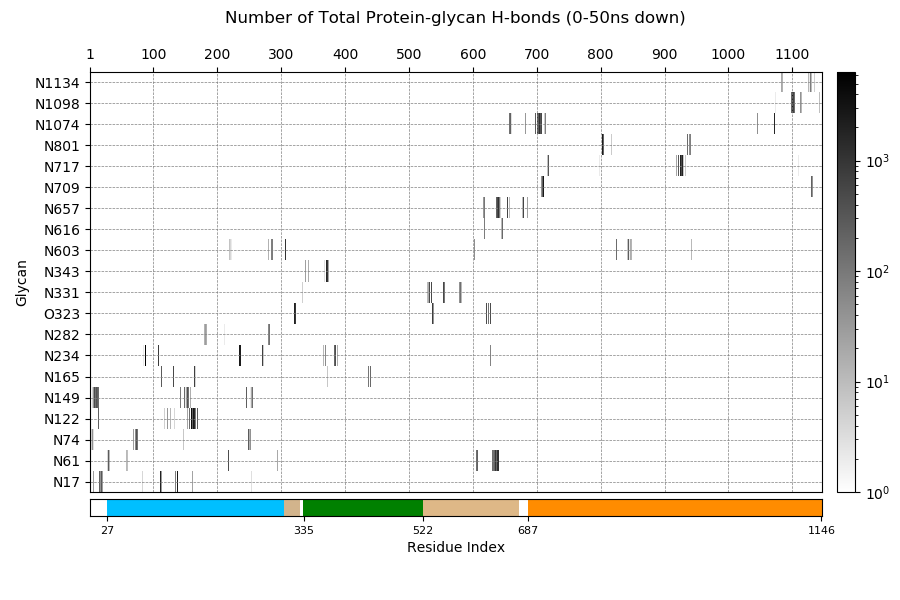

In [234]:
title=f"Number of Total Protein-glycan H-bonds ({skip*0.01:.0f}-50ns down)\n"

leftarr = np.arange(1, 1147)
leftarr = leftarr.reshape([1146,1])

# color map separated by domains
cmap2 = matplotlib.colors.ListedColormap(['white', 'deepskyblue', 'tan', 'white', 'green', 'burlywood', 'white', 'darkorange'])
boundaries = [1, 27, 305, 329, 335, 522, 673, 687, 1146]
norm2 = matplotlib.colors.BoundaryNorm(boundaries, cmap2.N, clip=True)

main_box = [0.1, 0.1+0.1-0.02, 0.85, 0.8-0.1]
bottom_box = [0.1, 0.06+0.1-0.02, 0.813, 0.028]

fig = plt.figure(figsize=[9,6])

main_ax = plt.axes(main_box)
bottom_ax = plt.axes(bottom_box)


pos = main_ax.imshow(bmap[order], cmap='gray_r', aspect='auto', origin='lower'
                     ,norm=matplotlib.colors.LogNorm())
main_ax.xaxis.tick_top()
tick = np.arange(12)*100
tick[0] = 1
main_ax.set_xticks(tick)
main_ax.set_yticks(np.arange(20))
main_ax.set_yticklabels(np.array(gset_res_down)[order])
main_ax.set_ylabel('Glycan')
main_ax.set_xlim(1,1146)
main_ax.set_title(f"{title}", fontsize=12)
main_ax.grid(which='major', color='gray', linestyle='--', linewidth=0.5)
divider = make_axes_locatable(main_ax)
cax = divider.append_axes("right", size="2.5%", pad=0.15)
plt.colorbar(pos, cax=cax)


bottom_ax.imshow(leftarr.T, aspect='auto', cmap=cmap2, norm=norm2)
bottom_ax.set_yticks([])
bottom_ax.set_xticks([26, 334, 521, 686, 1145])
bottom_ax.set_xticklabels([27, 335, 522, 687, 1146], fontsize=8)


# color bar


bottom_ax.set_xlabel('Residue Index', fontsize=10)
plt.show()

(5) Show position info for selected Hbond_in_glycan-residue pairs.

In [267]:
def filter_2Dmap(hbonds_2Dmap, hbonds_3Dmap, skip, thre, threframe=True):
    if threframe:
        bmapmask = hbonds_map_2D(hbonds_3Dmap, start=skip, countframe=True)
    else:
        bmapmask = hbonds_map_2D(hbonds_3Dmap, start=skip, countframe=False)
    # make frame < thre (threframe is True) or numbonds < thre (threframe is False) zero
    bmapmask[np.where(bmapmask<thre)] = 0
    bmapmask[np.where(bmapmask>=thre)] = 1
    return hbonds_2Dmap*bmapmask

In [292]:
skip2 = 1000

bmap2 = hbonds_map_2D(hbonds_down_pro_gly_map3d, start=skip2, countframe=False)

thre2 = 800

bmap2 = filter_2Dmap(bmap2, hbonds_down_pro_gly_map3d, skip2, thre2, threframe=True)

In [296]:
np.shape(np.sum(bmap2, axis=1))

(20,)

In [299]:
nonezerorow = np.where(np.sum(bmap2ordered, axis=1)>0)[0]

In [300]:
nonezerorow

array([ 0,  1,  2,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

<IPython.core.display.Javascript object>


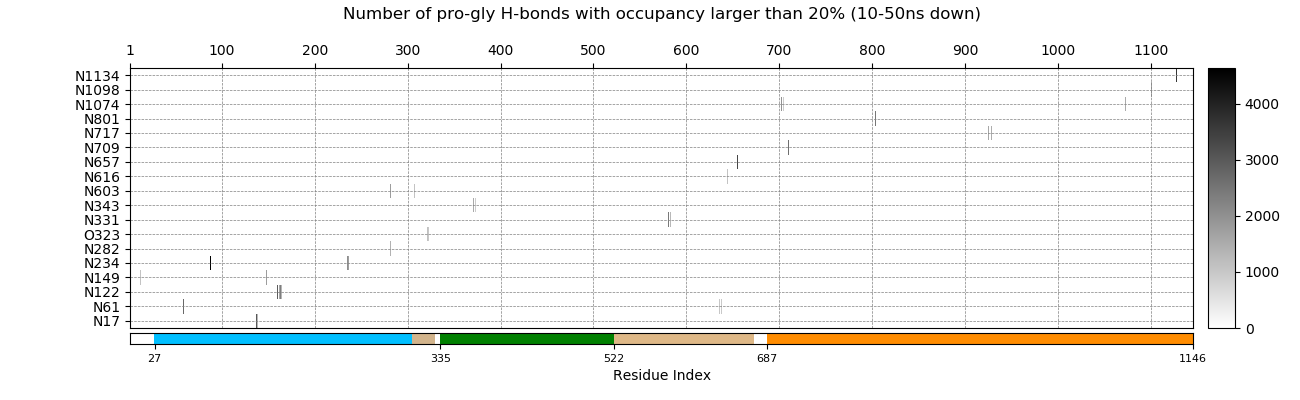

In [310]:
title=f"Number of pro-gly H-bonds with occupancy larger than {thre2/(5000-skip2)*100:.0f}% ({skip2*0.01:.0f}-50ns down)\n"

leftarr = np.arange(1, 1147)
leftarr = leftarr.reshape([1146,1])

# color map separated by domains
cmap2 = matplotlib.colors.ListedColormap(['white', 'deepskyblue', 'tan', 'white', 'green', 'burlywood', 'white', 'darkorange'])
boundaries = [1, 27, 305, 329, 335, 522, 673, 687, 1146]
norm2 = matplotlib.colors.BoundaryNorm(boundaries, cmap2.N, clip=True)

main_box = [0.1, 0.1+0.1-0.02, 0.85, 0.8-0.15]
bottom_box = [0.1, 0.06+0.1-0.02, 0.818, 0.028]

fig = plt.figure(figsize=[13,4])

main_ax = plt.axes(main_box)
bottom_ax = plt.axes(bottom_box)

bmap2ordered = bmap2[order]
capordered = np.array(gset_res_down)[order]
nonezerorow = np.where(np.sum(bmap2ordered, axis=1)>0)[0]

pos = main_ax.imshow(bmap2ordered[nonezerorow], cmap='gray_r', aspect='auto', origin='lower')
#                      ,norm=matplotlib.colors.LogNorm())

main_ax.xaxis.tick_top()
tick = np.arange(12)*100
tick[0] = 1
main_ax.set_xticks(tick)
main_ax.set_yticks(np.arange(len(nonezerorow)))
main_ax.set_yticklabels(capordered[nonezerorow])
# main_ax.set_ylabel('Glycan')
main_ax.set_xlim(1,1146)
main_ax.set_title(f"{title}", fontsize=12)
main_ax.grid(which='major', color='gray', linestyle='--', linewidth=0.5)
divider = make_axes_locatable(main_ax)
cax = divider.append_axes("right", size="2.5%", pad=0.15)
plt.colorbar(pos, cax=cax)


bottom_ax.imshow(leftarr.T, aspect='auto', cmap=cmap2, norm=norm2)
bottom_ax.set_yticks([])
bottom_ax.set_xticks([26, 334, 521, 686, 1145])
bottom_ax.set_xticklabels([27, 335, 522, 687, 1146], fontsize=8)


# color bar


bottom_ax.set_xlabel('Residue Index', fontsize=10)
plt.show()

# `Domain distance`

In [8]:
def domain_dist_array(U, spacing, sel1, sel2, start=0):
    dist = []
    for ts in U.trajectory[start::spacing]:
        part1 = U.select_atoms(sel1)
        part2 = U.select_atoms(sel2)

        part1_com = part1.center_of_mass(pbc=False, compound='group')
        part2_com = part2.center_of_mass(pbc=False, compound='group')

        dist.append(np.linalg.norm(part1_com-part2_com))
    return np.array(dist)

In [9]:
NTD = 'resid 27-304'
SD1 = 'resid 305-328'
RBD = 'resid 335-521'
SD2 = 'resid 522-672'
S2 = 'resid 687-1146'

In [197]:
dist_down_gly = domain_dist_array(U=U_gly_equildown_dry, spacing=10, sel1='resid 27-304', sel2='resid 335-521', start=0)

dist_down_nogly = domain_dist_array(U=U_nogly_equildown_dry, spacing=10, sel1='resid 27-304', sel2='resid 335-521', start=0)

c:\users\xinyan\anaconda3\envs\anaconda37pc\lib\site-packages\MDAnalysis\core\selection.py:640: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)


In [207]:
np.shape(dist_down_gly)

(5002,)

In [267]:
# with open(f'PSA_pkl/dist_NTD-RBD_50ns_down_gly_nogly.pkl', 'wb') as f:
#     pickle.dump([dist_down_gly, dist_down_nogly], f)

In [12]:
with open(f'PSA_pkl/dist_NTD-RBD_50ns_down_gly_nogly.pkl', 'rb') as f:
    dist_down_gly, dist_down_nogly = pickle.load(f)

In [315]:
dist_up_gly = domain_dist_array(U=U_gly_equilup_dry, spacing=10, sel1='resid 27-304', sel2='resid 335-521', start=0)

In [316]:
dist_up_nogly = domain_dist_array(U=U_nogly_equilup_dry, spacing=10, sel1='resid 27-304', sel2='resid 335-521', start=0)

<IPython.core.display.Javascript object>


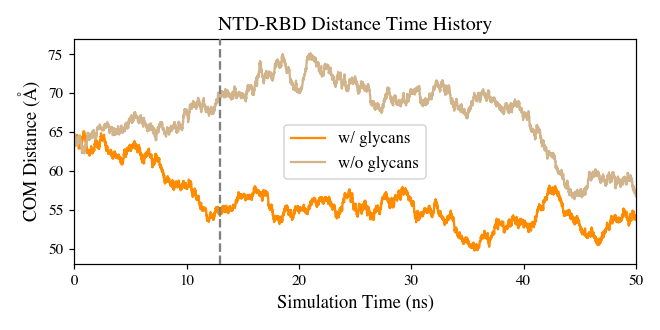

In [14]:
st = 0

fig = plt.figure(figsize=[6,3])
ax = fig.add_subplot(111)
ax.plot(np.arange(len(dist_down_gly[st:]))*0.01, dist_down_gly[st:], label='w/ glycans', color='darkorange')
ax.plot(np.arange(len(dist_down_nogly[st:]))*0.01, dist_down_nogly[st:], label='w/o glycans', color='tan')

yymin, yymax = 48, 77
plt.vlines(13, yymin, yymax, linestyle='--', colors='gray', zorder=5)
plt.xlim(st*0.01, 50)
plt.ylim(yymin, yymax)

plt.xlabel('Simulation Time (ns)', fontsize=12)
plt.ylabel('COM Distance ($\mathrm{\AA}$)', fontsize=12)
plt.title(f"NTD-RBD Distance Time History", fontsize=13)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

plt.savefig('ReportPlots/FreePlot/RBD-NTDdist-history.png', dpi=300)

<IPython.core.display.Javascript object>


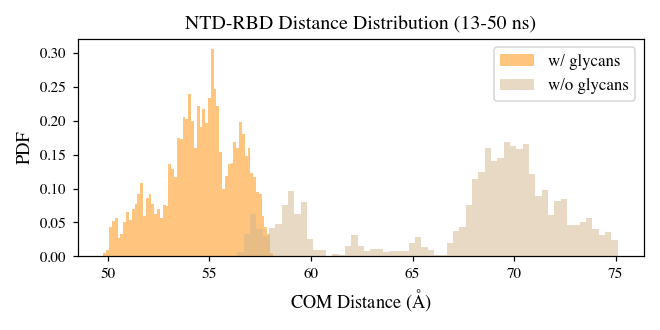

In [16]:
st = 1300
fig = plt.figure(figsize=[6,3])
ax = fig.add_subplot(111)
plt.hist(dist_down_gly[st:], bins=60, alpha=0.5, density=True, label='w/ glycans', color='darkorange')
plt.hist(dist_down_nogly[st:], bins=60, alpha=0.5, density=True, label='w/o glycans', color='tan')
# plt.xlim(45, 80)
# plt.ylim(0,1100)
plt.xlabel('COM Distance ($\mathrm{\AA}$)', fontsize=12)
plt.ylabel('PDF', fontsize=12)
plt.title(f"NTD-RBD Distance Distribution (13-50 ns)", fontsize=13)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

plt.savefig('ReportPlots/FreePlot/RBD-NTDdist-distri.png', dpi=300)

# `Pseudo angle`

In [452]:
def angle_array(U, spacing, atom1, atom2, atom3, start=0, pbc=False):
    ang_atom1 = U.select_atoms(f'protein and resid {atom1} and name CA').ix
    ang_atom2 = U.select_atoms(f'protein and resid {atom2} and name CA').ix
    ang_atom3 = U.select_atoms(f'protein and resid {atom3} and name CA').ix
    ang_set = []
    for ts in U.trajectory[start::spacing]:
        ang_test = mda.core.topologyobjects.Angle(np.array([ang_atom1, ang_atom2, ang_atom3]), 
                                                  U, type=None, guessed=False, order=None)
        ang_set.append(ang_test.value(pbc=pbc))
    ang_set = np.array(ang_set)
    return ang_set

### Down state pseudo angle 405-331-622 

In [461]:
ang_down_gly2 = angle_array(U_gly_equildown_dry, spacing=10, atom1=405, atom2=331, atom3=622, start=0, pbc=False)

In [462]:
ang_down_nogly2 = angle_array(U_nogly_equildown_dry, spacing=10, atom1=405, atom2=331, atom3=622, start=0, pbc=False)

In [617]:
st = 1200

<IPython.core.display.Javascript object>


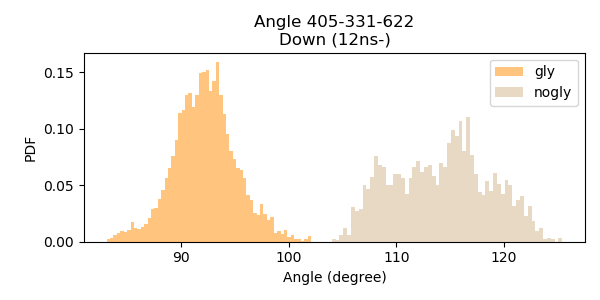

In [618]:
fig = plt.figure(figsize=[6,3])
ax = fig.add_subplot(111)
plt.hist(ang_down_gly2[st:], bins=60, alpha=0.5, density=True, label='gly', color='darkorange')
plt.hist(ang_down_nogly2[st:], bins=60, alpha=0.5, density=True, label='nogly', color='tan')
# plt.xlim(45, 80)
# plt.ylim(0,1100)
plt.xlabel('Angle (degree)')
plt.ylabel('PDF')
plt.title(f"Angle 405-331-622\nDown ({st*0.01:.0f}ns-)")
plt.legend()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


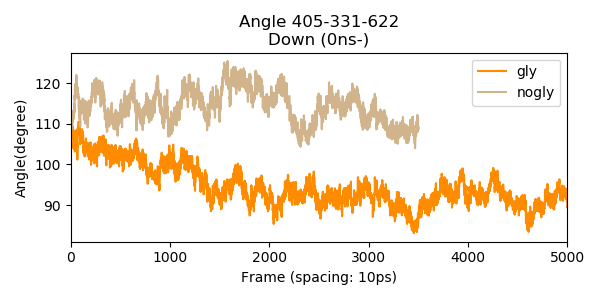

In [621]:
fig = plt.figure(figsize=[6,3])
ax = fig.add_subplot(111)
ax.plot(ang_down_gly2[0:], label='gly', color='darkorange')
ax.plot(ang_down_nogly2[0:], label='nogly', color='tan')
plt.xlim(0, 5000)
# plt.ylim(0,1100)
plt.xlabel('Frame (spacing: 10ps)')
plt.ylabel('Angle(degree)')
plt.title(f"Angle 405-331-622\nDown ({st*0.0:.0f}ns-)")
plt.legend()
plt.tight_layout()
plt.show()

### Up state pseudo angle 405-331-622 

In [580]:
ang_up_gly2 = angle_array(U_gly_equilup_dry, spacing=50, atom1=405, atom2=331, atom3=622, start=0, pbc=False)

In [581]:
ang_up_nogly2 = angle_array(U_nogly_equilup_dry, spacing=50, atom1=405, atom2=331, atom3=622, start=0, pbc=False)

In [595]:
st = 50

<IPython.core.display.Javascript object>


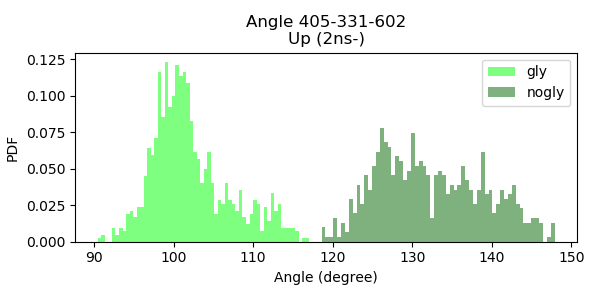

In [596]:
fig = plt.figure(figsize=[6,3])
ax = fig.add_subplot(111)
plt.hist(ang_up_gly2[st:], bins=60, alpha=0.5, density=True, label='gly', color='lime')
plt.hist(ang_up_nogly2[st:], bins=60, alpha=0.5, density=True, label='nogly', color='darkgreen')
# plt.xlim(45, 80)
# plt.ylim(0,1100)
plt.xlabel('Angle (degree)')
plt.ylabel('PDF')
plt.title(f"Angle 405-331-602\nUp ({st*0.05:.0f}ns-)")
plt.legend()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


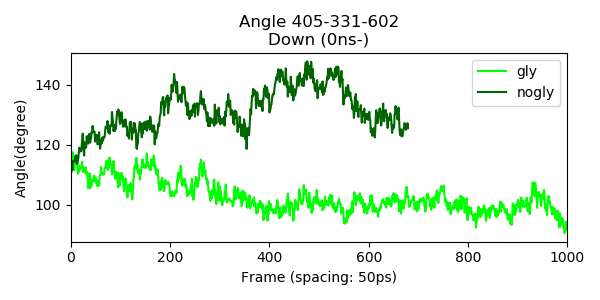

In [597]:
fig = plt.figure(figsize=[6,3])
ax = fig.add_subplot(111)
ax.plot(ang_up_gly2[0:], label='gly', color='lime')
ax.plot(ang_up_nogly2[0:], label='nogly', color='darkgreen')
plt.xlim(0, 1000)
# plt.ylim(0,1100)
plt.xlabel('Frame (spacing: 50ps)')
plt.ylabel('Angle(degree)')
plt.title(f"Angle 405-331-602\nDown ({st*0.0:.0f}ns-)")
plt.legend()
plt.tight_layout()
plt.show()

### Down state pseudo angle 603-580-RBD

In [213]:
from MDAnalysis.lib.distances import calc_angles

In [214]:
def angle_array_COMbased(U, atom1, atom2, atom3, spacing=10, start=0):
    ang_set = []
    for ts in U.trajectory[start::spacing]:
        ang_atom1 = U.select_atoms(atom1)
        ang_atom1p = ang_atom1.center_of_mass(pbc=False, compound='group')
        ang_atom2 = U.select_atoms(atom2)
        ang_atom2p = ang_atom2.center_of_mass(pbc=False, compound='group')
        ang_atom3 = U.select_atoms(atom3)
        ang_atom3p = ang_atom3.center_of_mass(pbc=False, compound='group')
        ang_test = calc_angles(ang_atom1p, ang_atom2p, ang_atom3p)/np.pi*180
        ang_set.append(ang_test)
    ang_set = np.array(ang_set)
    return ang_set

In [215]:
atom1 = 'protein and resid 603 and name CA'
atom2 = 'protein and resid 580 and name CA'
atom3 = 'protein and resid 335-521'

In [216]:
ang_down_gly3 = angle_array_COMbased(U_gly_equildown_dry, atom1, atom2, atom3, spacing=10, start=0)

c:\users\xinyan\anaconda3\envs\anaconda37pc\lib\site-packages\MDAnalysis\core\selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


In [217]:
ang_down_nogly3 = angle_array_COMbased(U_nogly_equildown_dry, atom1, atom2, atom3, spacing=10, start=0)

In [218]:
# with open(f'PSA_pkl/Ang_603-580-RBD_50ns_down_gly_nogly.pkl', 'wb') as f:
#     pickle.dump([ang_down_gly3, ang_down_nogly3], f)

In [18]:
with open(f'PSA_pkl/Ang_603-580-RBD_50ns_down_gly_nogly.pkl', 'rb') as f:
    ang_down_gly3, ang_down_nogly3 = pickle.load(f)

<IPython.core.display.Javascript object>


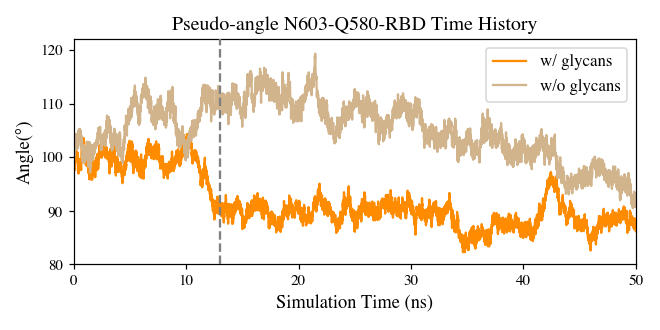

In [19]:
st = 0

fig = plt.figure(figsize=[6,3])
ax = fig.add_subplot(111)
ax.plot(np.arange(len(ang_down_gly3[st:]))*0.01, ang_down_gly3[st:], label='w/ glycans', color='darkorange')
ax.plot(np.arange(len(ang_down_nogly3[st:]))*0.01, ang_down_nogly3[st:], label='w/o glycans', color='tan')

yymin, yymax = 80, 122
plt.vlines(13, yymin, yymax, linestyle='--', colors='gray', zorder=5)
plt.xlim(st*0.01, 50)
plt.ylim(yymin, yymax)

plt.xlabel('Simulation Time (ns)', fontsize=12)
plt.ylabel('Angle(\N{DEGREE SIGN})', fontsize=12)
plt.title(f"Pseudo-angle N603-Q580-RBD Time History", fontsize=13)
plt.legend(loc='best', fontsize=11)
plt.tight_layout()
plt.show()

plt.savefig('ReportPlots/FreePlot/RBD-SDhinge-history.png', dpi=300)